# **Project--> Bio-Signal Analysis for Smoking**

# Problem Statement :

You are working as a data scientist in a global
company. Over the years, the company has
collected details and gathered a lot of
information about individuals. The
management wants to build an intelligent
system from the data to determine the
presence or absence of smoking in a person
through bio-signals. Given a person’s
information, build a machine learning model
that can classify the presence or absence of
smoking

# Importing the Libraries

In [5]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [4]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [6]:
# Checking the first few rows and dimension of the dataset
#df = pd.read_csv(io.BytesIO(uploaded['smoking.csv']))
df = pd.read_csv('smoking.csv')
print('Shape of Data is ',df.shape)
df.tail()

Shape of Data is  (55692, 27)


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0
55691,55691,M,55,160,65,85.0,0.9,0.7,1.0,1.0,...,15.0,1.0,0.8,26.0,29.0,41.0,Y,0,Y,1


In [7]:
df=df.drop(columns=['ID','oral'])
df.shape

(55692, 25)

# Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [9]:
df.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.004830,9.679278,40.0,70.0,76.0,82.0,146.0


In [11]:
df.nunique()

gender                   2
age                     14
height(cm)              13
weight(kg)              22
waist(cm)              566
eyesight(left)          19
eyesight(right)         17
hearing(left)            2
hearing(right)           2
systolic               130
relaxation              95
fasting blood sugar    276
Cholesterol            286
triglyceride           390
HDL                    126
LDL                    289
hemoglobin             145
Urine protein            6
serum creatinine        38
AST                    219
ALT                    245
Gtp                    488
dental caries            2
tartar                   2
smoking                  2
dtype: int64

# **Data Visualization**

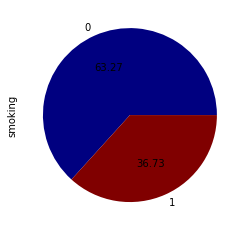

In [12]:
df['smoking'].value_counts().plot(kind='pie',autopct='%0.2f',cmap='jet');

Insight-->From above piechart it is showing 63% are non smokers and 36.7% are smokers.

<Axes: xlabel='gender', ylabel='count'>

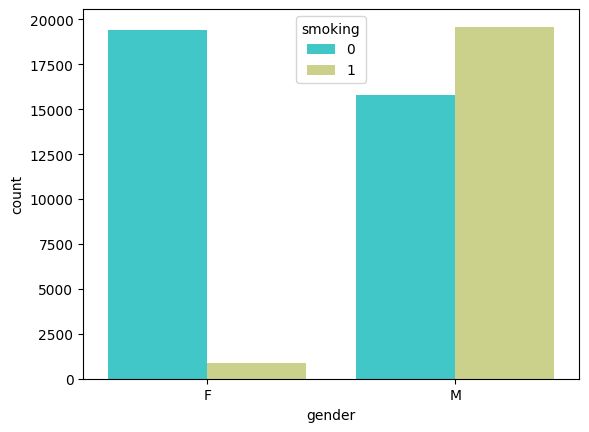

In [46]:
sns.countplot(x='gender',data=df,hue='smoking',palette='rainbow')

Insight-->we can clearly see from above graph that most smokers are men.

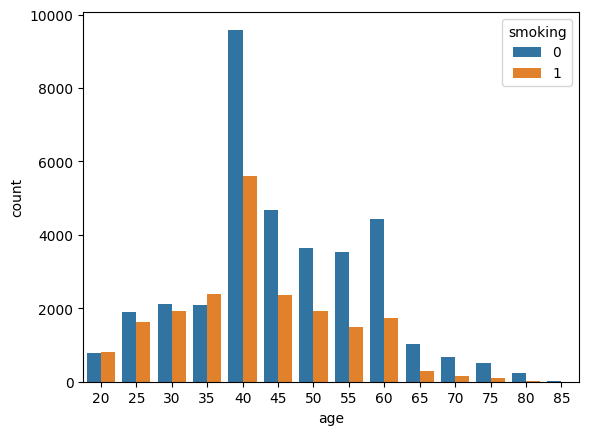

In [51]:
sns.countplot(data=df,x='age',hue='smoking');

Most number of smokers are having the age 40

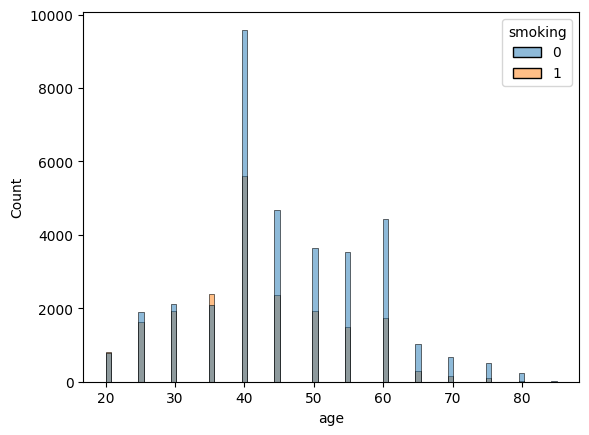

In [52]:
sns.histplot(data=df,x='age',hue='smoking');

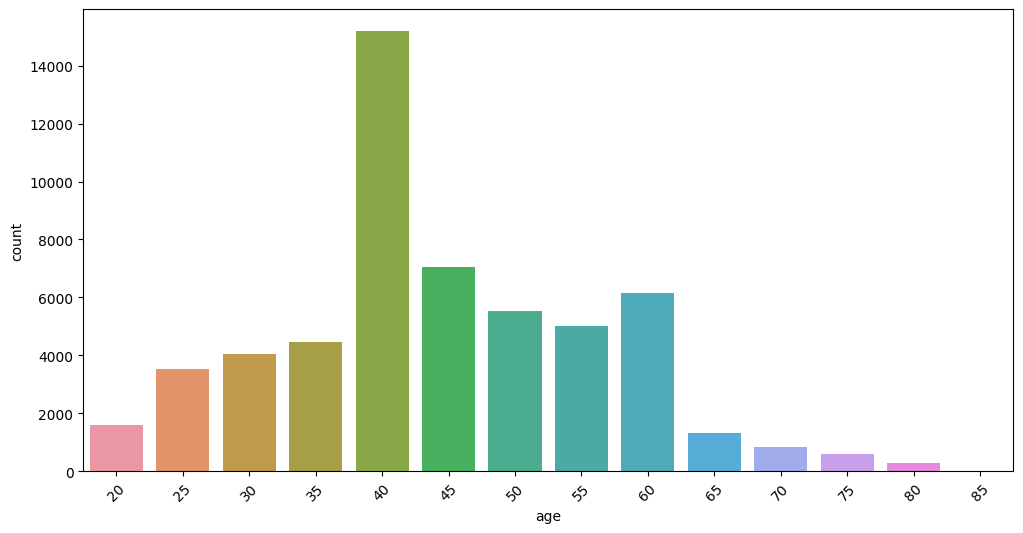

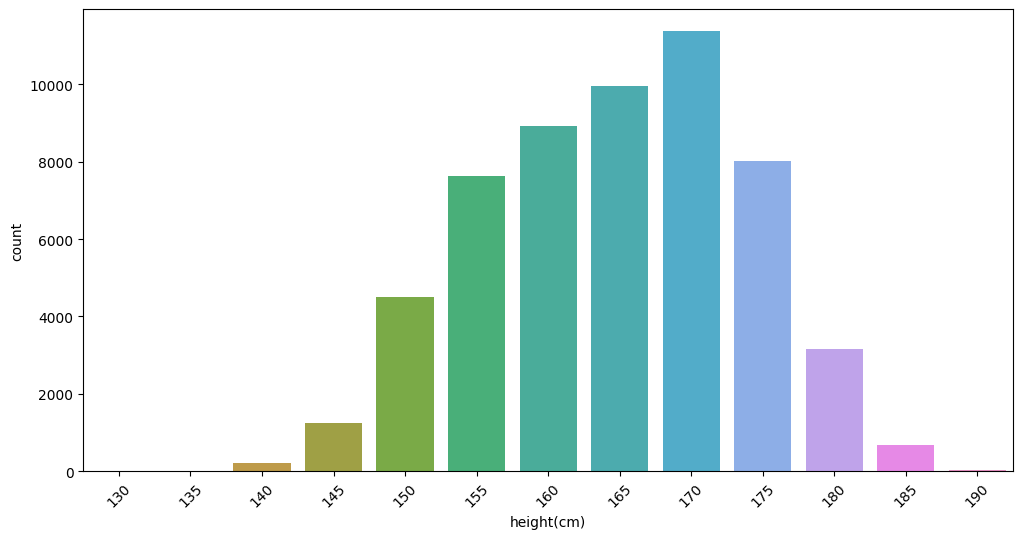

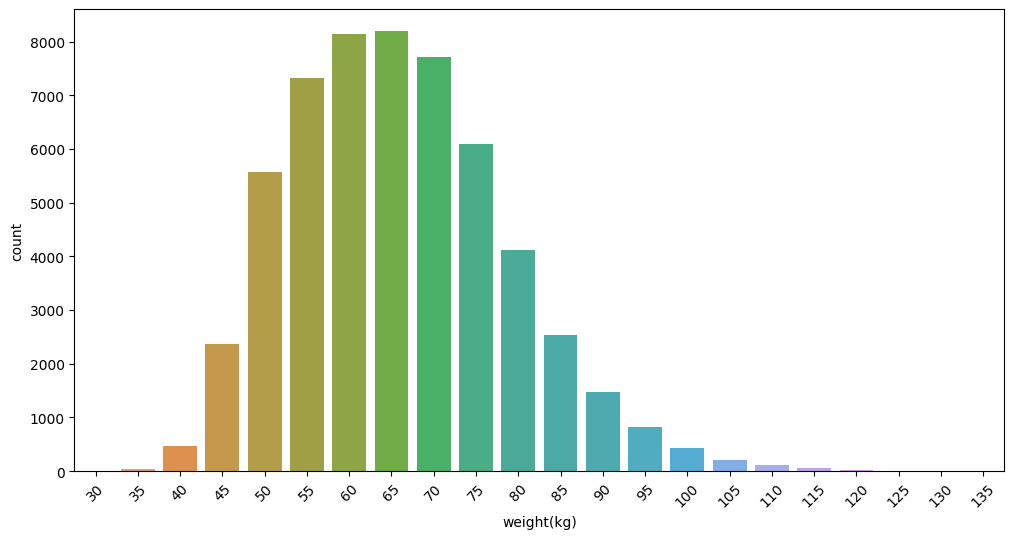

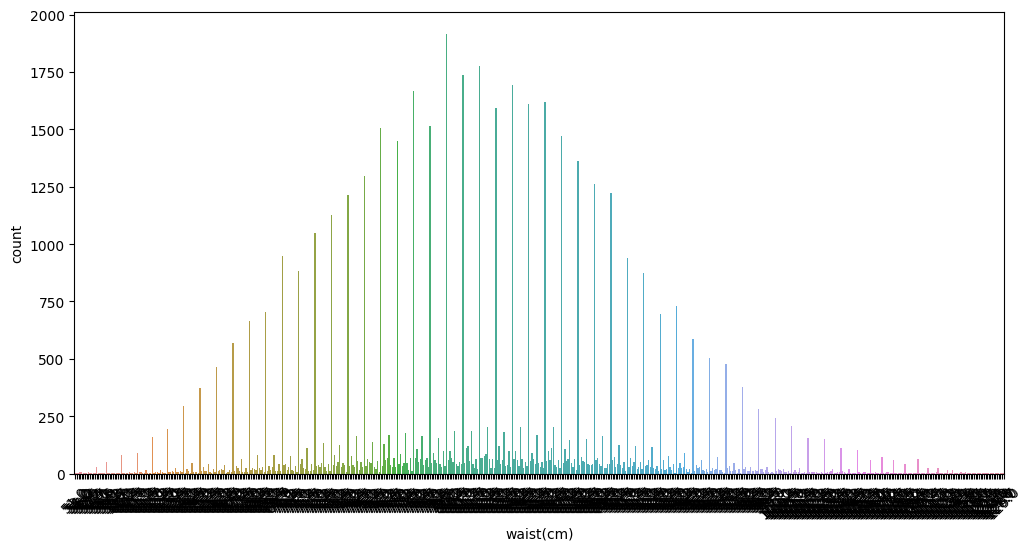

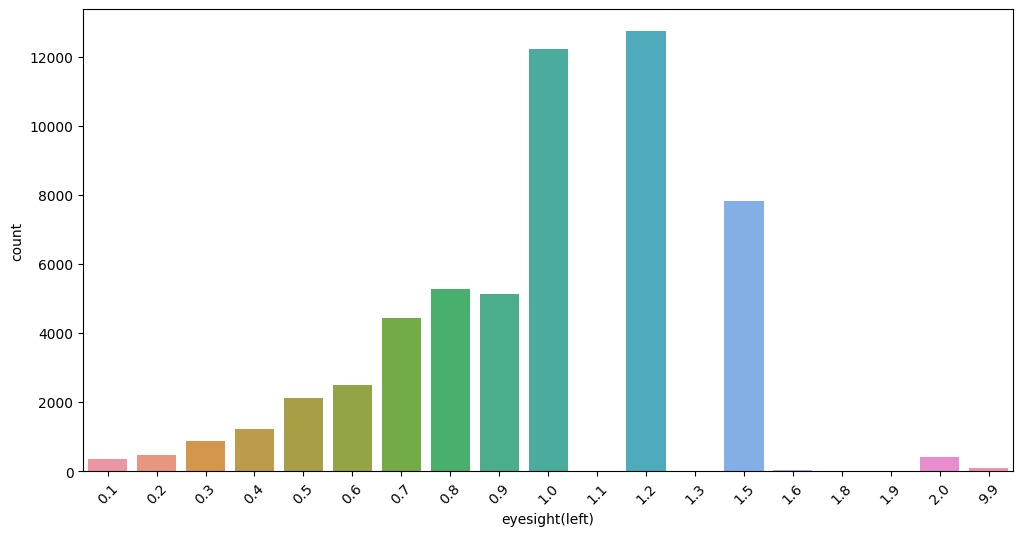

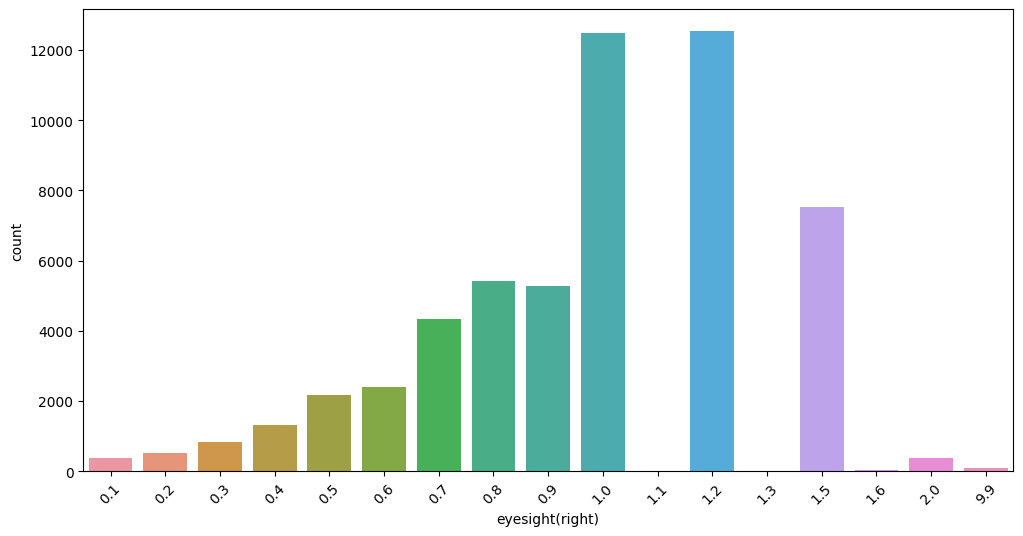

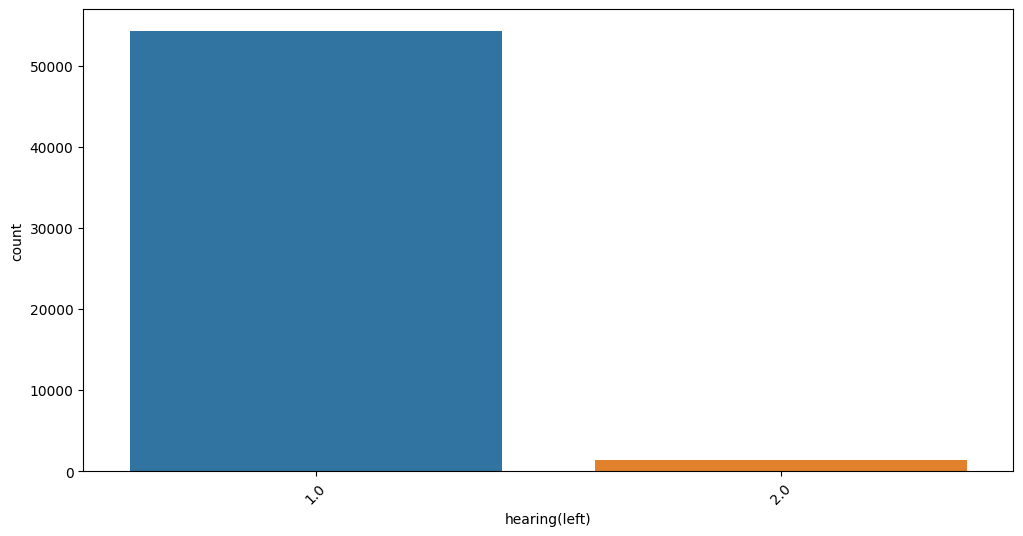

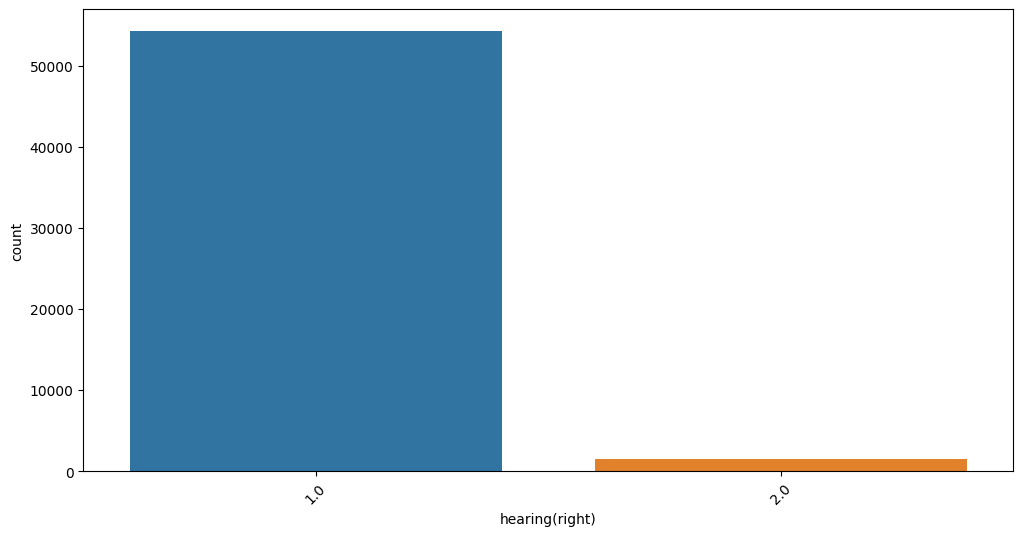

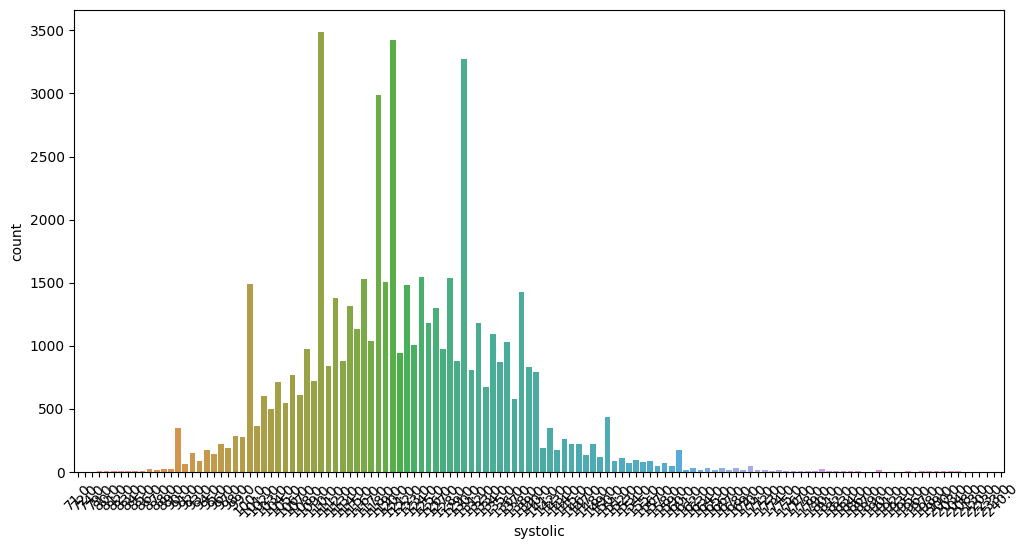

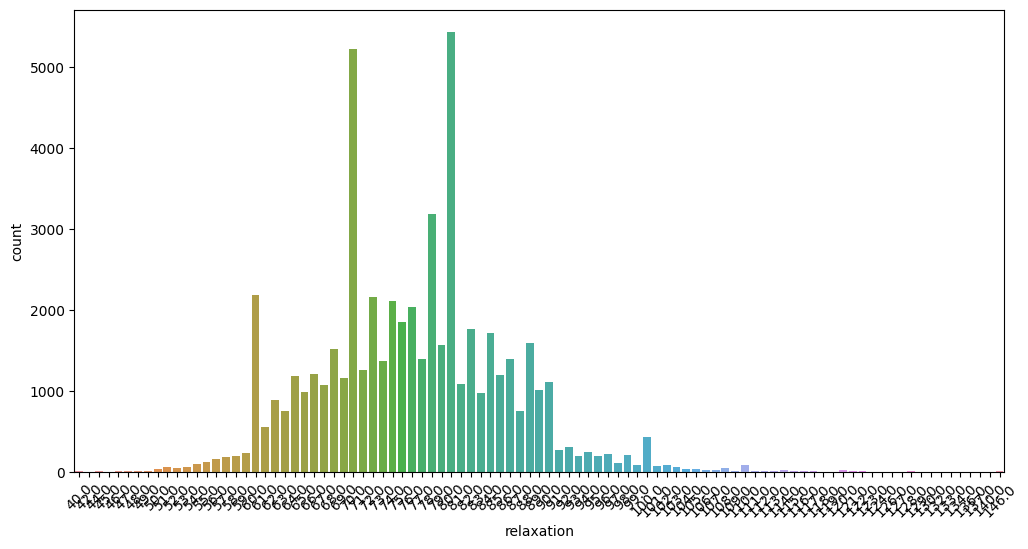

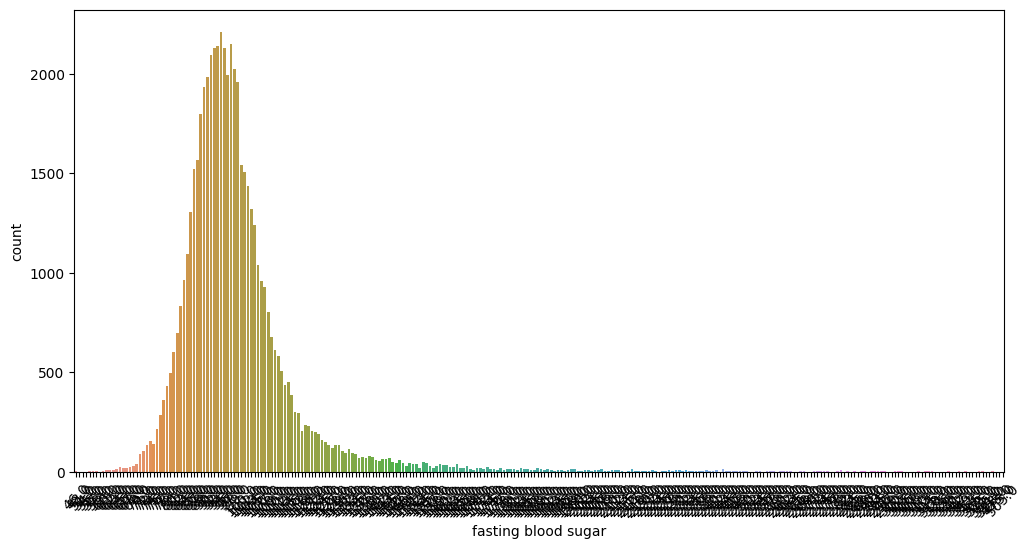

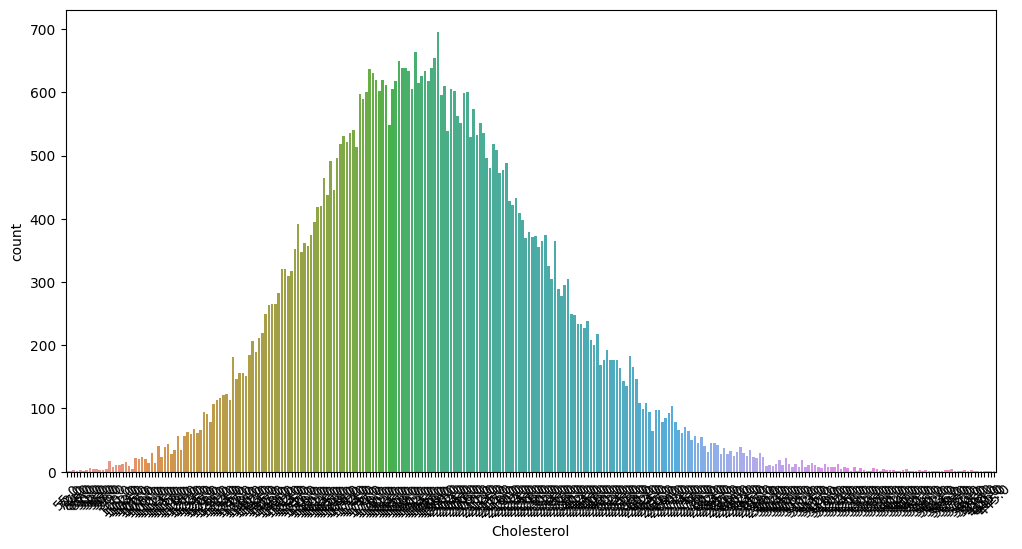

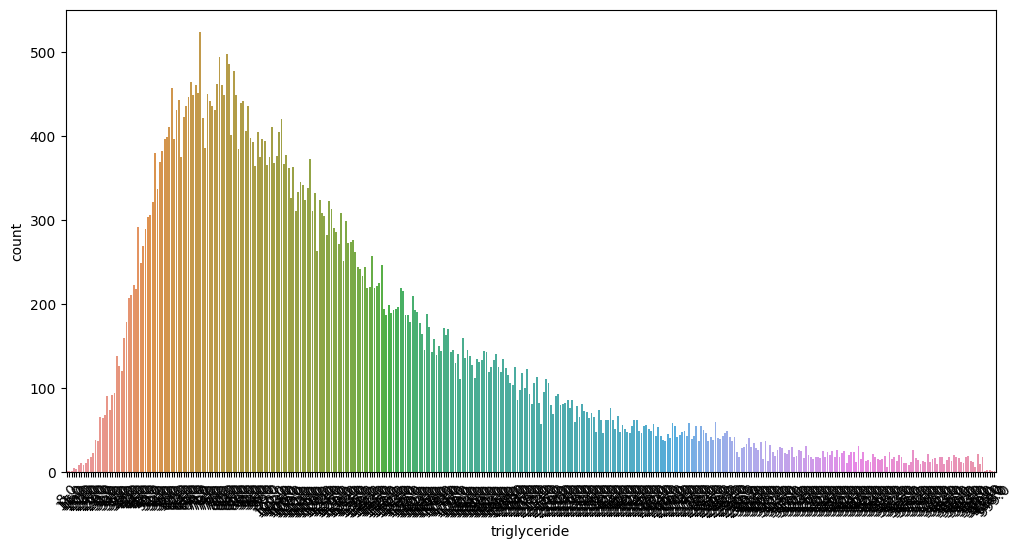

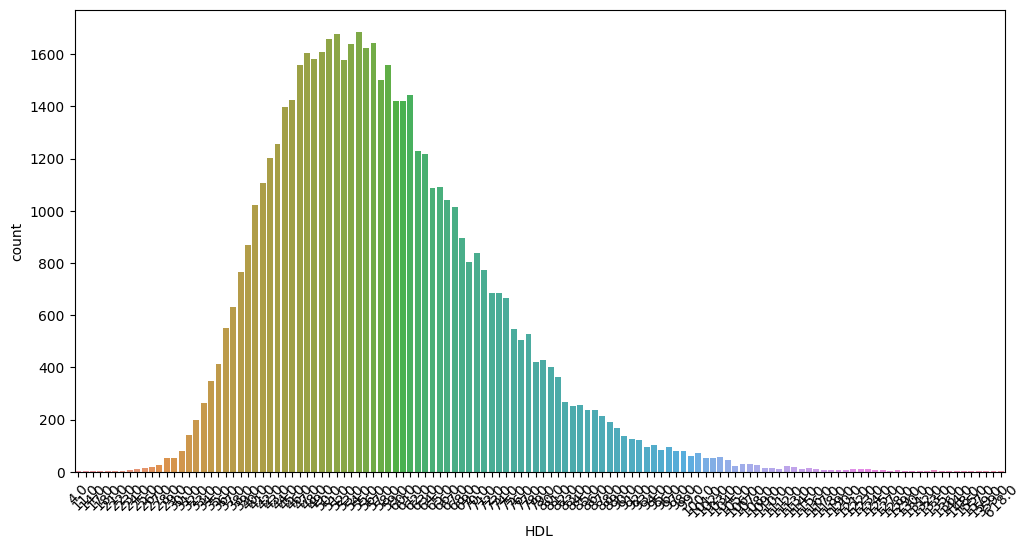

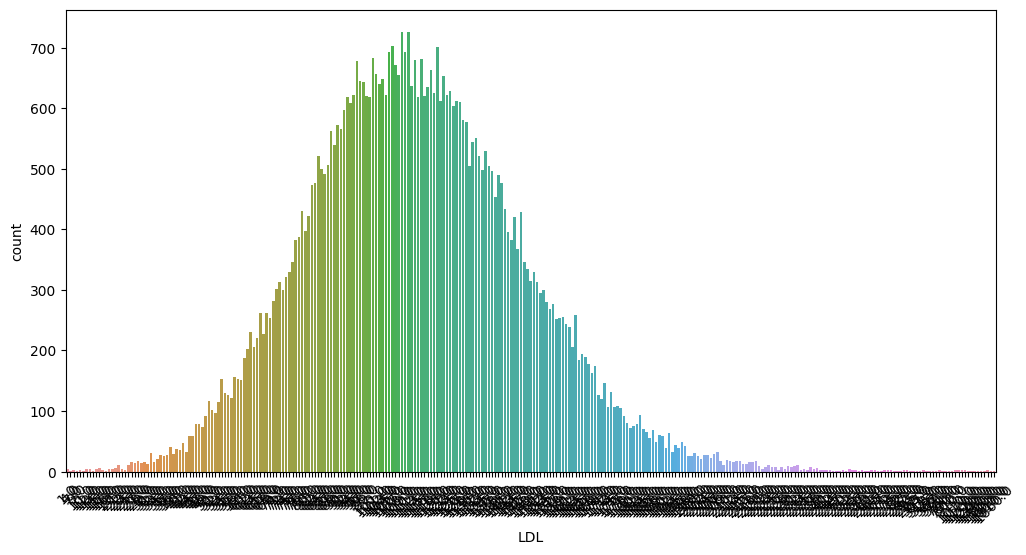

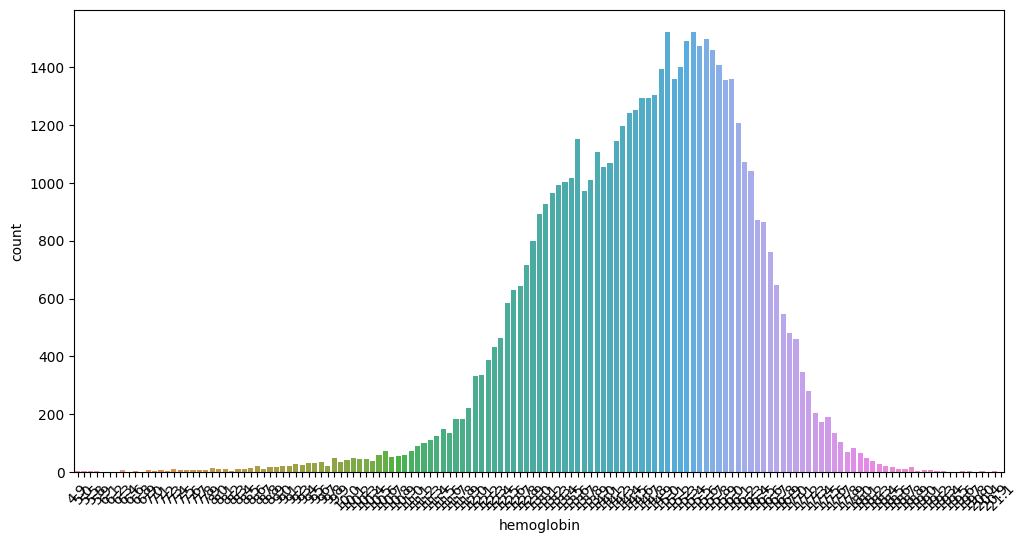

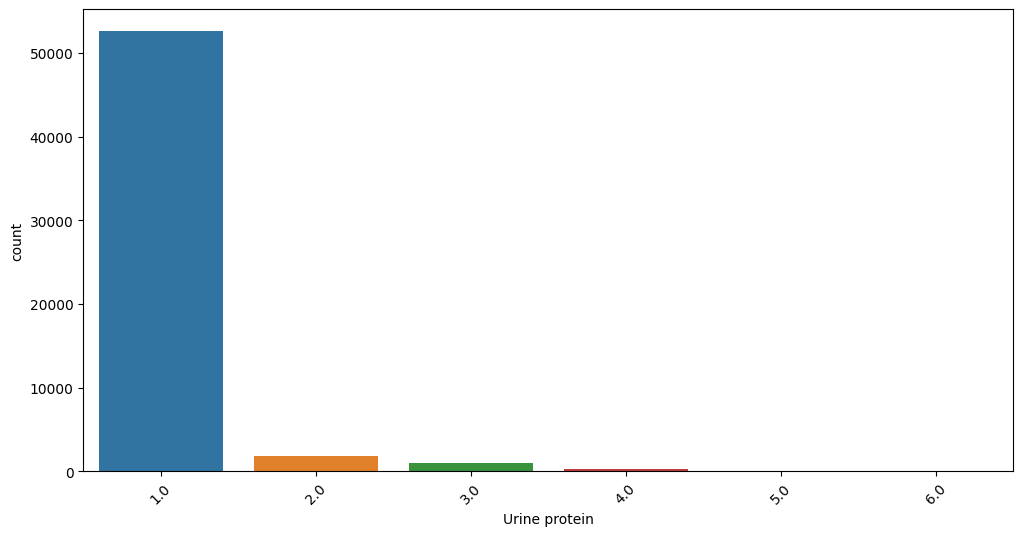

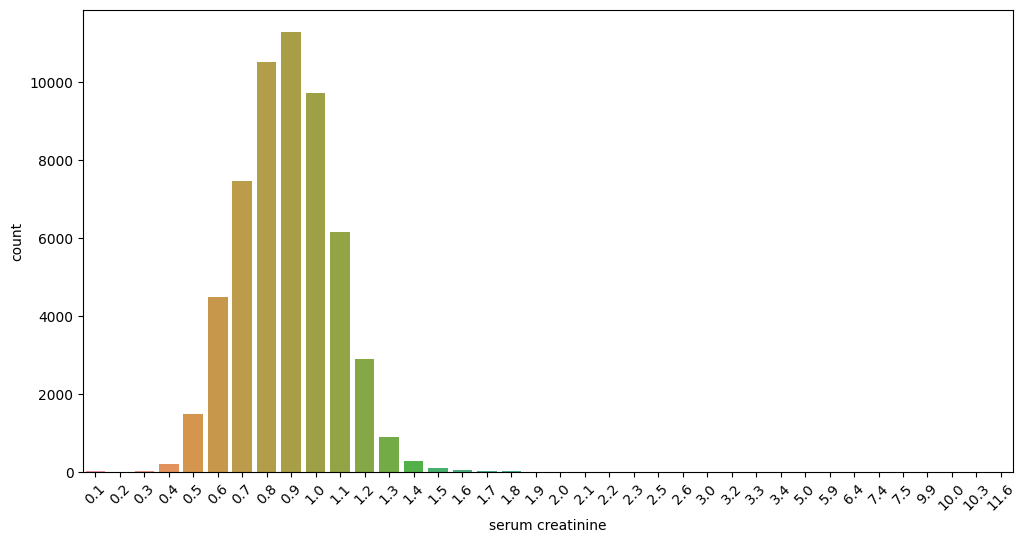

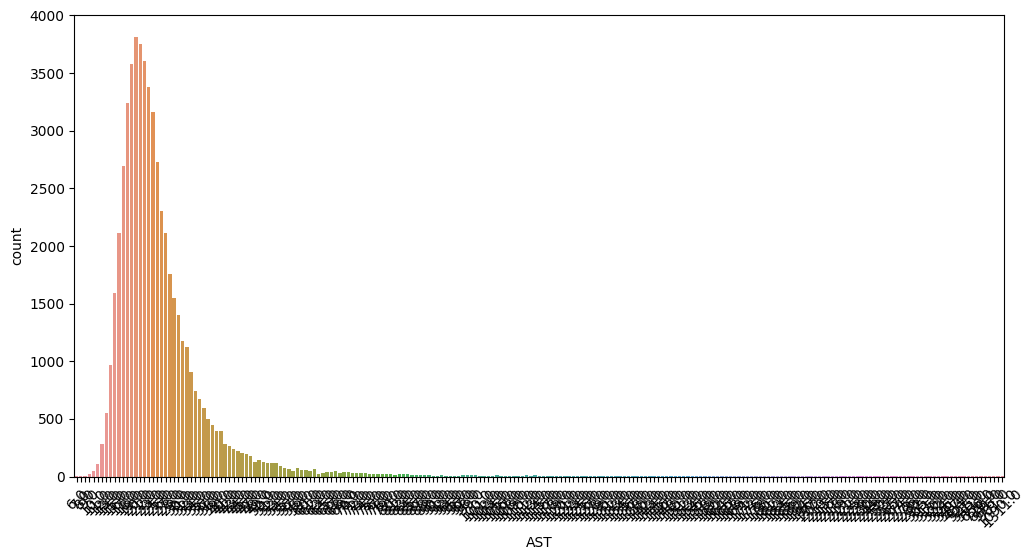

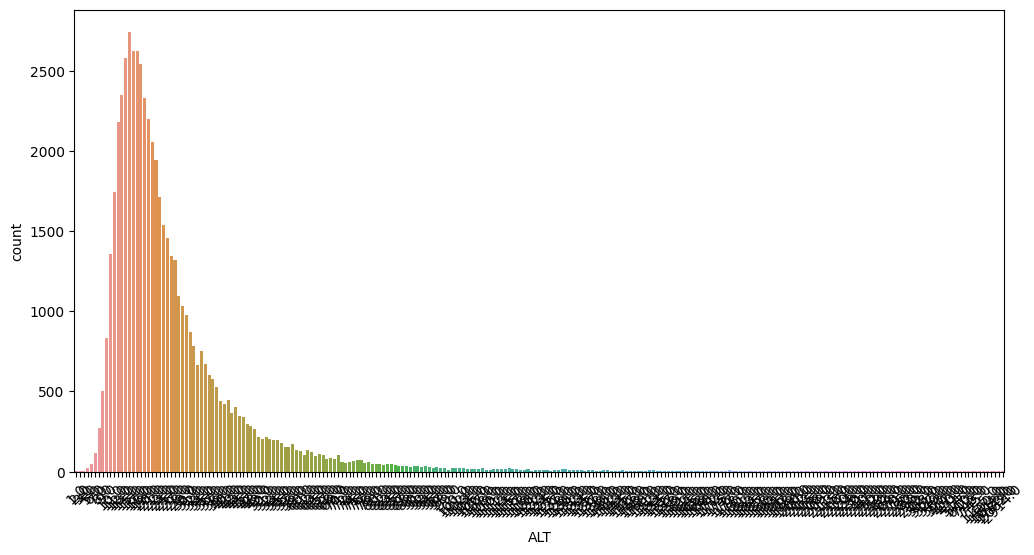

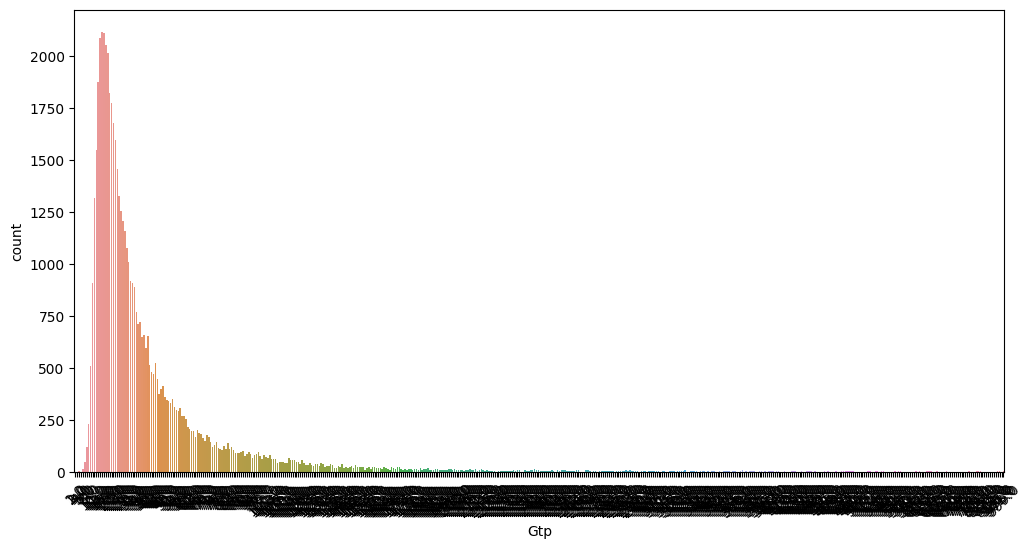

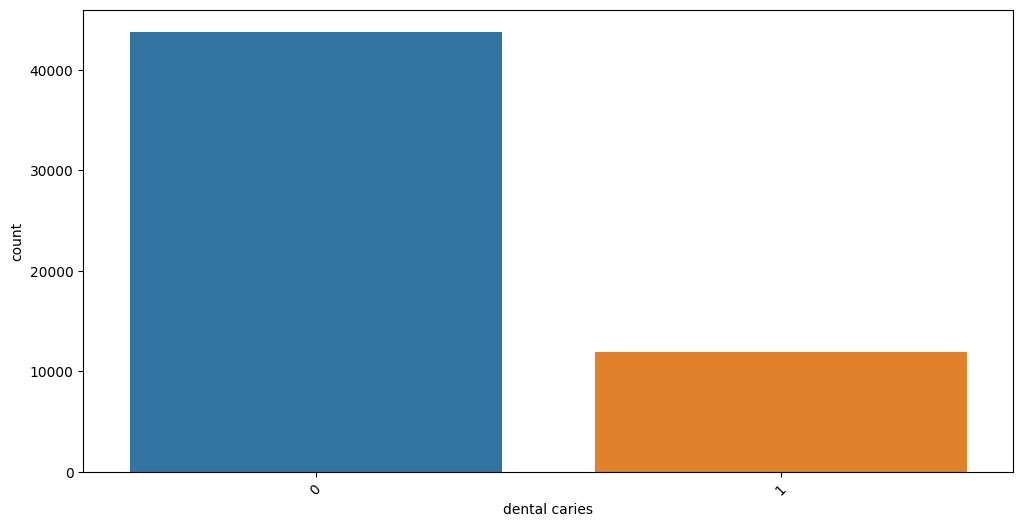

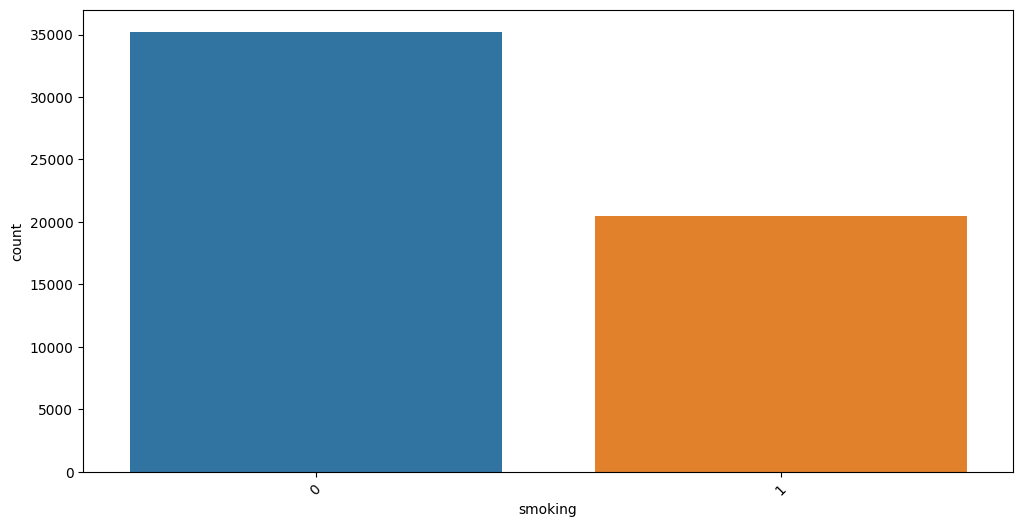

In [68]:
for i in df.columns:
    if (df[i].dtypes=='int64' or df[i].dtypes=='float'):
    plt.figure(figsize=(12,6))
    sns.countplot(x=df[i])
    plt.xticks(rotation=45)
    plt.show()

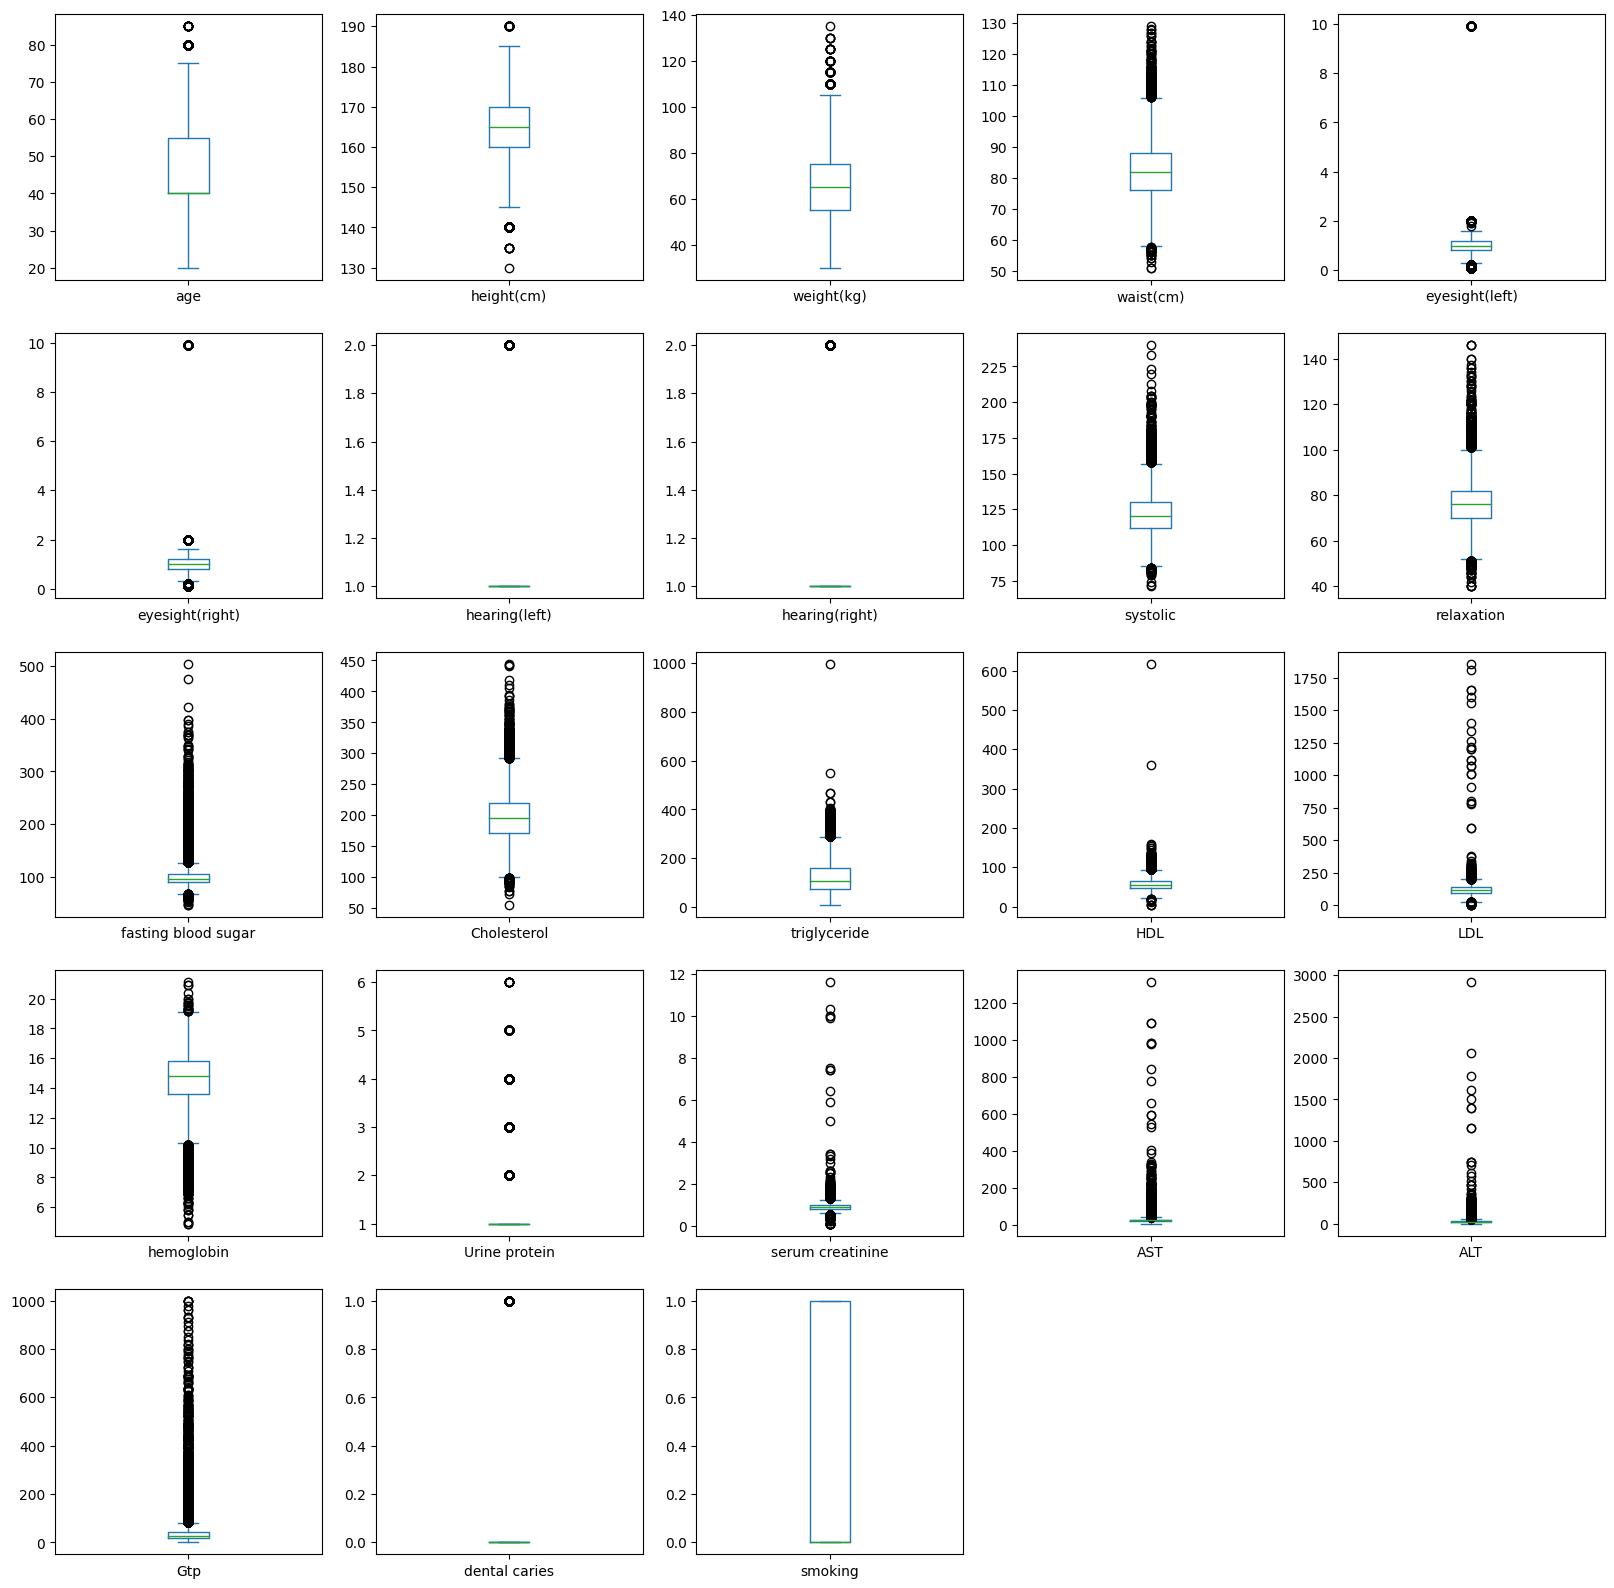

In [63]:
# Checking out the outliers in a dataframe
df.plot(kind='box',figsize=(20,20),layout=(5,5),sharex= False,subplots=True);

Representation of columns using boxplot to detect outliers. Here outliers represent natural
variations in the population, and they should be left as is in the dataset. These are called true
outliers. Therefore for this dataset we will not remove outliers

# Label Encoder(Data Cleaning)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = le.fit_transform(df[i])
    #df.info()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int32  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

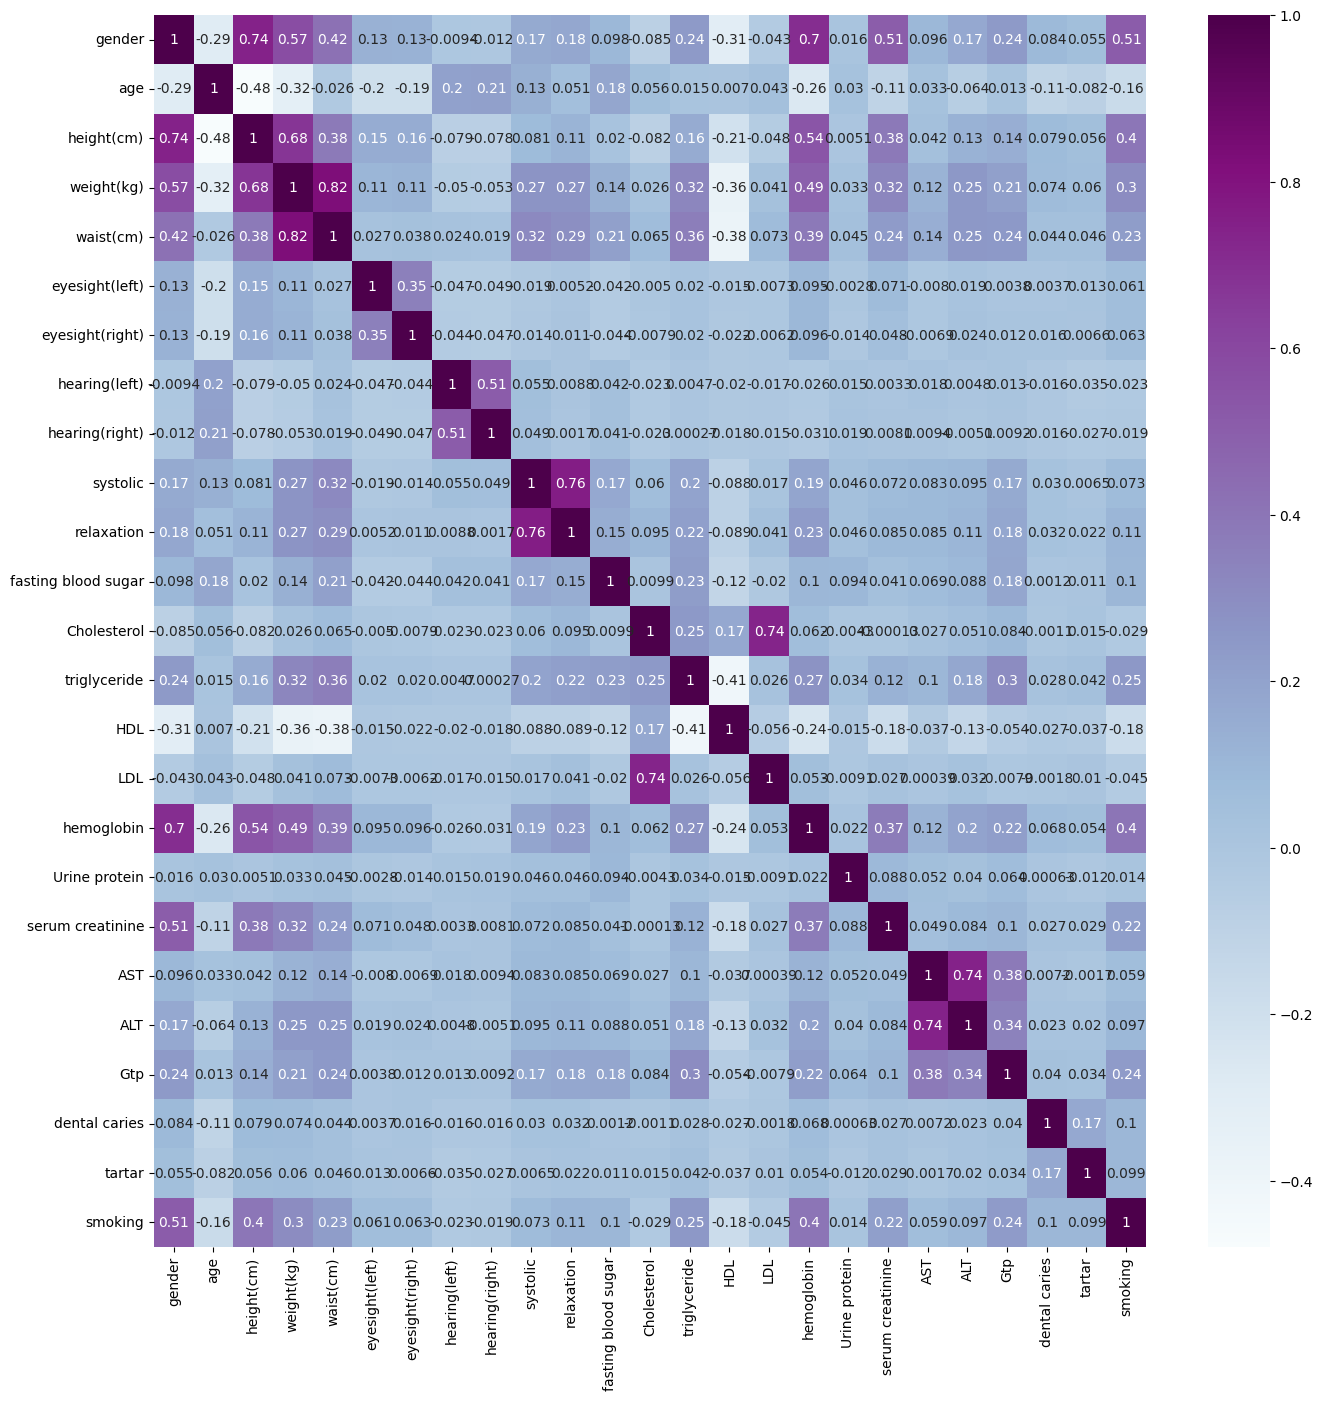

In [87]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,cmap='BuPu');

## Feature selection using feature importance

In [17]:
x = df.iloc[:,:-1]
y = df['smoking']

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [19]:
model.feature_importances_

array([0.26044657, 0.0326297 , 0.02039494, 0.02017882, 0.04997861,
       0.02564265, 0.02043394, 0.00144619, 0.00138309, 0.0445833 ,
       0.03486309, 0.04629091, 0.04745562, 0.05816734, 0.04499578,
       0.04461875, 0.05068325, 0.00374572, 0.02327121, 0.03747644,
       0.04585795, 0.07117533, 0.00723403, 0.00704675])

In [20]:
df1=pd.Series(model.feature_importances_, index=x.columns).sort_values()
df1

hearing(right)         0.001383
hearing(left)          0.001446
Urine protein          0.003746
tartar                 0.007047
dental caries          0.007234
weight(kg)             0.020179
height(cm)             0.020395
eyesight(right)        0.020434
serum creatinine       0.023271
eyesight(left)         0.025643
age                    0.032630
relaxation             0.034863
AST                    0.037476
systolic               0.044583
LDL                    0.044619
HDL                    0.044996
ALT                    0.045858
fasting blood sugar    0.046291
Cholesterol            0.047456
waist(cm)              0.049979
hemoglobin             0.050683
triglyceride           0.058167
Gtp                    0.071175
gender                 0.260447
dtype: float64

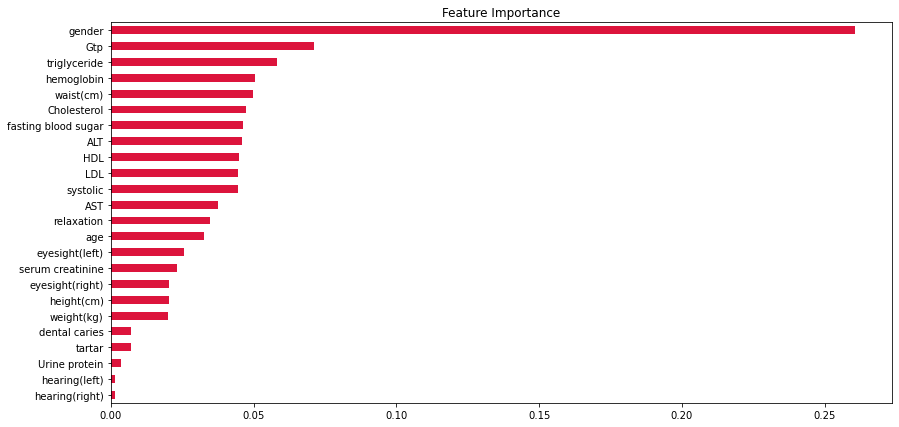

In [21]:
plt.figure(figsize=(14,7))
plt.title('Feature Importance')
df1.plot(kind='barh',color='crimson');


Feature importance is a technique
that calculate a score for all the
input features for a given model. So
out of 24 features we will select the
top 15 features based on the score.


# Model Building

In [22]:
x = df.drop(columns=['smoking','AST','relaxation','age','eyesight(left)','serum creatinine','eyesight(right)','height(cm)','weight(kg)',
                    'tartar','dental caries','Urine protein','hearing(right)','hearing(left)'],axis=1)
y = df['smoking']

In [23]:
x.head(2)

,gender,waist(cm),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT,Gtp
0,0,81.3,114.0,94.0,215.0,82.0,73.0,126.0,12.9,19.0,27.0
1,0,81.0,119.0,130.0,192.0,115.0,42.0,127.0,12.7,19.0,18.0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Models: LogisticRegression,DecisionTree,Bagging Classifier,RandomForest Classifier,ExtraTreesClassifier

Calculating accuracy
and generating the
classification report


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import *

In [26]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt,n_estimators=1000)
rf = RandomForestClassifier()
etc = ExtraTreesClassifier()

Bootstrap Aggregation or bagging involves taking multiple samples from the training dataset
(with replacement) and training a model for each sample

In [27]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)
bc.fit(x_train,y_train)
y_pred3 = bc.predict(x_test)
etc.fit(x_train,y_train)
y_pred4 = etc.predict(x_test)

In [28]:
print('Accuracy of LogisticRegression Model is :',accuracy_score(y_test,y_pred)*100)
print('Accuracy of DecisionTreeClassifier Model is :',accuracy_score(y_test,y_pred1)*100)
print('Accuracy of RandomForestClassifier Model is :',accuracy_score(y_test,y_pred2)*100)
print('Accuracy of BaggingClassifier Model is :',accuracy_score(y_test,y_pred3)*100)
print('Accuracy of ExtraTreeClassifier Model is :',accuracy_score(y_test,y_pred4)*100)


Accuracy of LogisticRegression Model is : 73.55159205171175
Accuracy of DecisionTreeClassifier Model is : 77.07086425664352
Accuracy of RandomForestClassifier Model is : 80.84749820445296
Accuracy of BaggingClassifier Model is : 81.1527412018195
Accuracy of ExtraTreeClassifier Model is : 80.50035910940866


In [29]:
print('Classification Report of LogisticRegression Model :')
print(classification_report(y_test,y_pred))
print('Classification Report of DecisionTreeClassifier Model :')
print(classification_report(y_test,y_pred1))
print('Classification Report of RandomForestClassifier Model :')
print(classification_report(y_test,y_pred2))
print('Classification Report of BaggingClassifier Model :')
print(classification_report(y_test,y_pred3))
print('Classification Report of ExtraTreeClassifier Model :')
print(classification_report(y_test,y_pred4))

Classification Report of LogisticRegression Model :
              precision    recall  f1-score   support

           0       0.80      0.77      0.79     10557
           1       0.63      0.68      0.65      6151

    accuracy                           0.74     16708
   macro avg       0.72      0.72      0.72     16708
weighted avg       0.74      0.74      0.74     16708

Classification Report of DecisionTreeClassifier Model :
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     10557
           1       0.69      0.68      0.69      6151

    accuracy                           0.77     16708
   macro avg       0.75      0.75      0.75     16708
weighted avg       0.77      0.77      0.77     16708

Classification Report of RandomForestClassifier Model :
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     10557
           1       0.73      0.76      0.74      6151

    accuracy      

THANK YOU